In [1]:
from AnalysisGiessen import analyseGiessen
import pandas as pd
import numpy as np 

In [13]:
n_sample = 500
n_params = 5
file = pd.read_csv(f"../Data/Synthetic/Output_{n_sample}/pressure_traces_rv/all_pressure_traces.csv")
file

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,CO,dt,EF,dPAP,sPAP,mPAP
0,1.025559,1.770995,2.923223,4.469365,6.392138,8.670054,11.277653,14.185794,17.361977,20.770706,...,0.671965,0.671965,0.689453,1.017268,3.562928,0.004832,0.320044,0.220627,32.788355,9.266864
1,1.309923,2.509024,4.621598,7.624035,11.482764,15.993526,20.311177,23.426483,25.092988,25.515489,...,1.023021,1.023021,1.023021,1.315794,3.927774,0.008139,0.528045,0.102879,25.522830,7.757553
2,1.857248,2.245696,3.019993,4.171484,5.687296,7.550486,9.740235,12.232074,14.975554,17.634534,...,1.803717,1.803717,1.803717,1.851547,3.299307,0.009601,0.412388,0.458891,29.132116,8.752175
3,0.933357,2.049230,3.953451,6.624736,9.994009,13.664550,16.935974,19.097401,19.893798,19.461631,...,0.613595,0.613595,0.613595,0.932854,3.877907,0.006205,0.469520,0.054895,19.902606,5.275308
4,0.950426,1.952630,3.614757,5.918229,8.837302,12.339346,16.385232,20.794461,24.893945,27.901420,...,0.614713,0.614713,0.614713,0.943525,3.838552,0.005575,0.412197,0.104321,29.420748,8.447840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.957844,1.495684,2.365044,3.556208,5.055861,6.847244,8.910338,11.222087,13.676875,16.041946,...,0.751337,0.751337,0.752830,0.951868,3.864557,0.005384,0.375292,0.191922,20.787417,6.347870
496,1.080093,2.082389,3.847793,6.356569,9.580679,13.484089,17.897553,21.854603,24.188646,24.869646,...,0.829692,0.829692,0.829692,1.072773,3.207115,0.008790,0.483812,0.103691,24.871107,7.564190
497,1.101932,1.720942,2.811510,4.361445,6.353427,8.765193,11.569789,14.575255,17.479633,19.918614,...,0.965109,0.965109,0.965109,1.117218,4.434862,0.005734,0.429770,0.199211,25.598357,7.867785
498,0.898966,1.987578,3.747203,6.158172,9.193538,12.819379,16.995175,21.674262,26.721460,31.272725,...,0.485241,0.485241,0.488248,0.889215,3.853567,0.004361,0.359831,0.100835,36.744473,9.922298


In [3]:
df = file.iloc[:1, :100].T
df_repeated = pd.concat([df] * 10, axis=0, ignore_index=True)
df_repeated.columns = ["Pressure"]
df_repeated["cPressure"] = df_repeated['Pressure']
df_repeated

,Pressure,cPressure
0,1.025559,1.025559
1,1.770995,1.770995
2,2.923223,2.923223
3,4.469365,4.469365
4,6.392138,6.392138
...,...,...
995,0.671965,0.671965
996,0.671965,0.671965
997,0.671965,0.671965
998,0.689453,0.689453


In [4]:
ag = analyseGiessen(df=df_repeated)

In [5]:
ag.df

,Pressure,cPressure
0,1.025559,1.025559
1,1.770995,1.770995
2,2.923223,2.923223
3,4.469365,4.469365
4,6.392138,6.392138
...,...,...
995,0.671965,0.671965
996,0.671965,0.671965
997,0.671965,0.671965
998,0.689453,0.689453


In [6]:
ag.compute_derivatives(use_filter=False)

In [7]:
ag.compute_points_of_interest(height=100, use_filter=False)

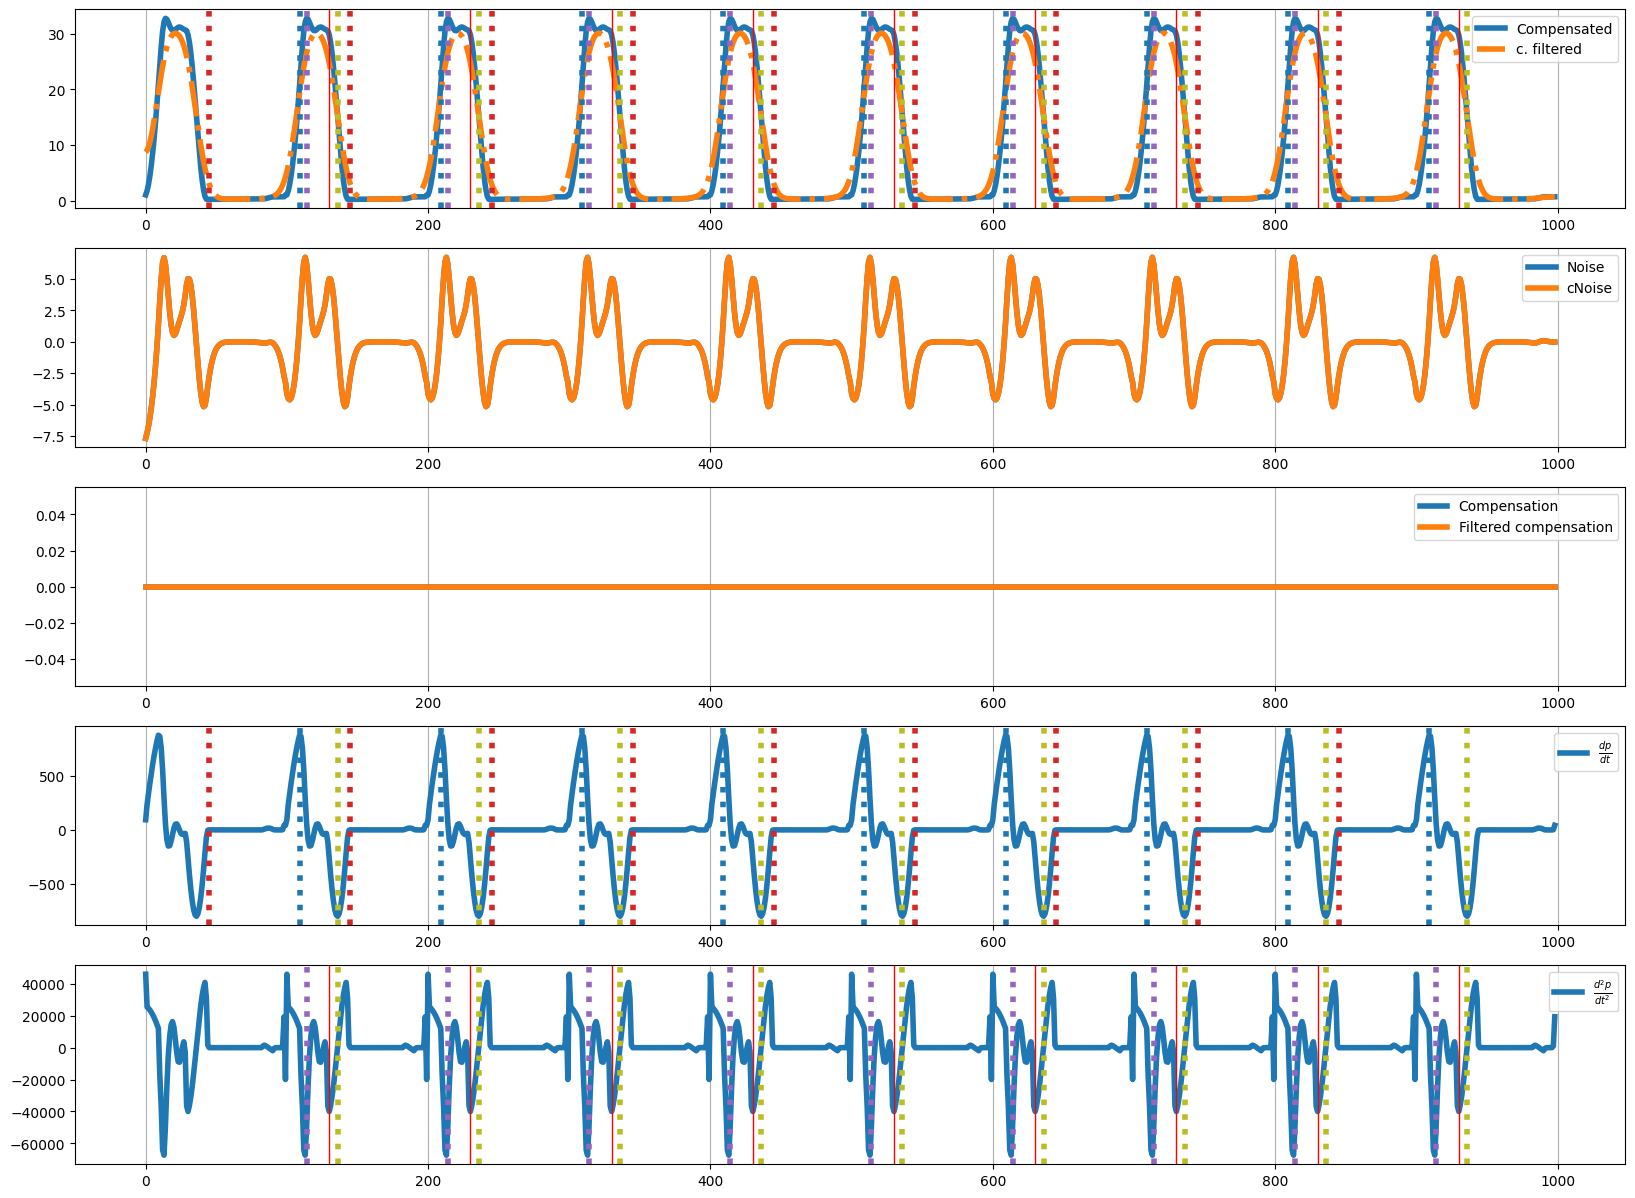

In [8]:
ag.plot_pressures()

In [9]:
beats = pd.DataFrame(ag.resample_heart_beat())
sumstats = ag.points_df

In [10]:
pd.concat([beats, sumstats.iloc[:-1,:]], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,A_p,P_max,esp,sys,EF,dia,tau,Ees/Ea,iT,iHR
0,2.964957,2.314119,1.789751,1.376502,1.058044,0.818169,0.641653,0.514843,0.42599,0.365363,...,17.842948,46.485493,29.81047,32.770222,0.358715,0.227437,0.009197,0.559368,0.0,0.0
1,2.964957,2.314119,1.789751,1.376502,1.058044,0.818169,0.641653,0.514843,0.42599,0.365363,...,17.842948,46.485493,29.81047,32.770222,0.358715,0.227437,0.009197,0.559368,0.4,150.0
2,2.964957,2.314119,1.789751,1.376502,1.058044,0.818169,0.641653,0.514843,0.42599,0.365363,...,17.842948,46.485493,29.81047,32.770222,0.358715,0.227437,0.009197,0.559368,0.4,150.0
3,2.964957,2.314119,1.789751,1.376502,1.058044,0.818169,0.641653,0.514843,0.42599,0.365363,...,17.842948,46.485493,29.81047,32.770222,0.358715,0.227437,0.009197,0.559368,0.4,150.0
4,2.964957,2.314119,1.789751,1.376502,1.058044,0.818169,0.641653,0.514843,0.42599,0.365363,...,17.842948,46.485493,29.81047,32.770222,0.358715,0.227437,0.009197,0.559368,0.4,150.0
5,2.964957,2.314119,1.789751,1.376502,1.058044,0.818169,0.641653,0.514843,0.42599,0.365363,...,17.842948,46.485493,29.81047,32.770222,0.358715,0.227437,0.009197,0.559368,0.4,150.0
6,2.964957,2.314119,1.789751,1.376502,1.058044,0.818169,0.641653,0.514843,0.42599,0.365363,...,17.842948,46.485493,29.81047,32.770222,0.358715,0.227437,0.009197,0.559368,0.4,150.0
7,2.964957,2.314119,1.789751,1.376502,1.058044,0.818169,0.641653,0.514843,0.42599,0.365363,...,17.842948,46.485493,29.81047,32.770222,0.358715,0.227437,0.009197,0.559368,0.4,150.0


In [11]:
file

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,CO,dt,EF,dPAP,sPAP,mPAP
0,1.025559,1.770995,2.923223,4.469365,6.392138,8.670054,11.277653,14.185794,17.361977,20.770706,...,0.671965,0.671965,0.689453,1.017268,3.562928,0.004832,0.320044,0.220627,32.788355,9.266864
1,1.309923,2.509024,4.621598,7.624035,11.482764,15.993526,20.311177,23.426483,25.092988,25.515489,...,1.023021,1.023021,1.023021,1.315794,3.927774,0.008139,0.528045,0.102879,25.522830,7.757553
2,1.857248,2.245696,3.019993,4.171484,5.687296,7.550486,9.740235,12.232074,14.975554,17.634534,...,1.803717,1.803717,1.803717,1.851547,3.299307,0.009601,0.412388,0.458891,29.132116,8.752175
3,0.933357,2.049230,3.953451,6.624736,9.994009,13.664550,16.935974,19.097401,19.893798,19.461631,...,0.613595,0.613595,0.613595,0.932854,3.877907,0.006205,0.469520,0.054895,19.902606,5.275308
4,0.950426,1.952630,3.614757,5.918229,8.837302,12.339346,16.385232,20.794461,24.893945,27.901420,...,0.614713,0.614713,0.614713,0.943525,3.838552,0.005575,0.412197,0.104321,29.420748,8.447840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.957844,1.495684,2.365044,3.556208,5.055861,6.847244,8.910338,11.222087,13.676875,16.041946,...,0.751337,0.751337,0.752830,0.951868,3.864557,0.005384,0.375292,0.191922,20.787417,6.347870
496,1.080093,2.082389,3.847793,6.356569,9.580679,13.484089,17.897553,21.854603,24.188646,24.869646,...,0.829692,0.829692,0.829692,1.072773,3.207115,0.008790,0.483812,0.103691,24.871107,7.564190
497,1.101932,1.720942,2.811510,4.361445,6.353427,8.765193,11.569789,14.575255,17.479633,19.918614,...,0.965109,0.965109,0.965109,1.117218,4.434862,0.005734,0.429770,0.199211,25.598357,7.867785
498,0.898966,1.987578,3.747203,6.158172,9.193538,12.819379,16.995175,21.674262,26.721460,31.272725,...,0.485241,0.485241,0.488248,0.889215,3.853567,0.004361,0.359831,0.100835,36.744473,9.922298


In [17]:
all_pressure_traces = pd.DataFrame()
for ind in range(len(file)):
    f= file.iloc[[ind], :100].T
    f_repeated = pd.concat([f] * 10, axis=0, ignore_index=True)
    f_repeated.columns = ["Pressure"]
    f_repeated["cPressure"] = f_repeated['Pressure']
    f_repeated

    ag = analyseGiessen(df=f_repeated)

    ag.compute_derivatives(use_filter=False)

    ag.compute_points_of_interest(height=100, use_filter=False)

    beats = pd.DataFrame(ag.resample_heart_beat())
    sumstats = ag.points_df

    resampled_df = pd.concat([beats, sumstats.iloc[:-1,:]], axis=1)
    all_pressure_traces = pd.concat([all_pressure_traces, resampled_df.iloc[[2]]], axis=0)
    all_pressure_traces.reset_index(drop=True, inplace=True)
    


all_pressure_traces.to_csv(f"../Data/Synthetic/Output_{n_sample}/resampled_all_pressure_traces_rv.csv")
#all_pressure_traces.to_csv("/Users/pmzff/Documents/GitHub/ModularCircFF/Max_param_Emulator/Outputs/Output_200/resampled_all_pressure_traces_rv")
all_pressure_traces.to_csv(f"/Users/pmzff/Documents/GitHub/ModularCircFF/Emulation/Outputs/Output_{n_sample}_{n_params}params/resampled_all_pressure_traces_rv.csv", index=False)
all_pressure_traces

,0,1,2,3,4,5,6,7,8,9,...,A_p,P_max,esp,sys,EF,dia,tau,Ees/Ea,iT,iHR
0,2.964957,2.314119,1.789751,1.376502,1.058044,0.818169,0.641653,0.514843,0.425990,0.365363,...,17.842948,46.485493,29.810470,32.770222,0.358715,0.227437,0.009197,0.559368,0.4,150.0
1,2.374772,1.868053,1.457316,1.132088,0.880761,0.691446,0.552692,0.453999,0.386159,0.341405,...,13.870385,43.126933,20.825154,25.515489,0.517120,0.126640,0.010185,1.070906,0.4,150.0
2,3.574609,2.871468,2.295324,1.833546,1.471666,1.194535,0.987291,0.836111,0.728704,0.654571,...,14.198399,40.225590,27.581034,29.132104,0.314341,0.463087,0.008804,0.458451,0.4,150.0
3,1.482799,1.162859,0.904226,0.700045,0.542785,0.424791,0.338732,0.277924,0.236521,0.209607,...,8.700673,29.501717,13.854965,19.893798,0.530367,0.070679,0.009972,1.129324,0.4,150.0
4,2.597491,2.023392,1.558599,1.190695,0.906135,0.691223,0.532888,0.419253,0.339969,0.286370,...,16.982045,46.692317,25.044438,29.293639,0.463628,0.117975,0.009787,0.864379,0.4,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2.098053,1.656948,1.300650,1.019284,0.802177,0.638606,0.518399,0.432354,0.372493,0.332159,...,11.951210,31.834026,19.684723,20.785952,0.381645,0.204250,0.009582,0.617195,0.4,150.0
496,2.384404,1.871600,1.455276,1.124923,0.868883,0.675219,0.532427,0.429967,0.358598,0.310531,...,14.870433,42.658207,21.760492,24.869646,0.489887,0.124551,0.010190,0.960351,0.4,150.0
497,2.732419,2.158420,1.692112,1.321801,1.034517,0.816981,0.656394,0.541028,0.460587,0.406382,...,13.932399,39.243201,23.486145,25.593874,0.401523,0.214388,0.010203,0.670909,0.4,150.0
498,3.006426,2.328668,1.780655,1.347309,1.012328,0.759333,0.572783,0.438624,0.344666,0.280731,...,18.568277,53.803941,28.687928,36.583343,0.466806,0.110995,0.009590,0.875491,0.4,150.0
